In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBClassifier
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

import warnings

warnings.filterwarnings('ignore')

# Data Preparation and Cleaning

In [ ]:
uploaded = files.upload()

Saving phone.csv to phone.csv


In [ ]:
data = pandas.read_csv("phone.csv")

In [ ]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# * Check the distribution of data
print(data.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [ ]:
# * Check missing values
print(data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
# * Outlier Detection
numeric_columns = data.select_dtypes(include=numpy.number).columns

# Calculate Z-scores
z_scores = data[numeric_columns].apply(zscore)

# Identify outliers based on Z-scores
outliers = data[(z_scores.abs() > 2.5).any(axis=1)]
print("OUTLIERS: ")
print(outliers)

OUTLIERS: 
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
39              560     0          0.5         1  15       0          50   
41             1646     1          2.3         0   8       1          41   
63             1720     0          2.0         0  15       1          55   
78             1199     1          2.5         1  15       1          16   
183             959     1          2.6         1  15       0          20   
219            1551     0          1.1         0   4       0          51   
345             654     1          1.3         0   0       1          52   
350             609     1          3.0         0  15       1          44   
392            1860     1          2.3         0  15       0          23   
447            1349     0          2.0         1  15       0          62   
561            1229     0          0.5         1  15       0          14   
568            1288     0          2.8         1  15       0          50   
6

<Axes: >

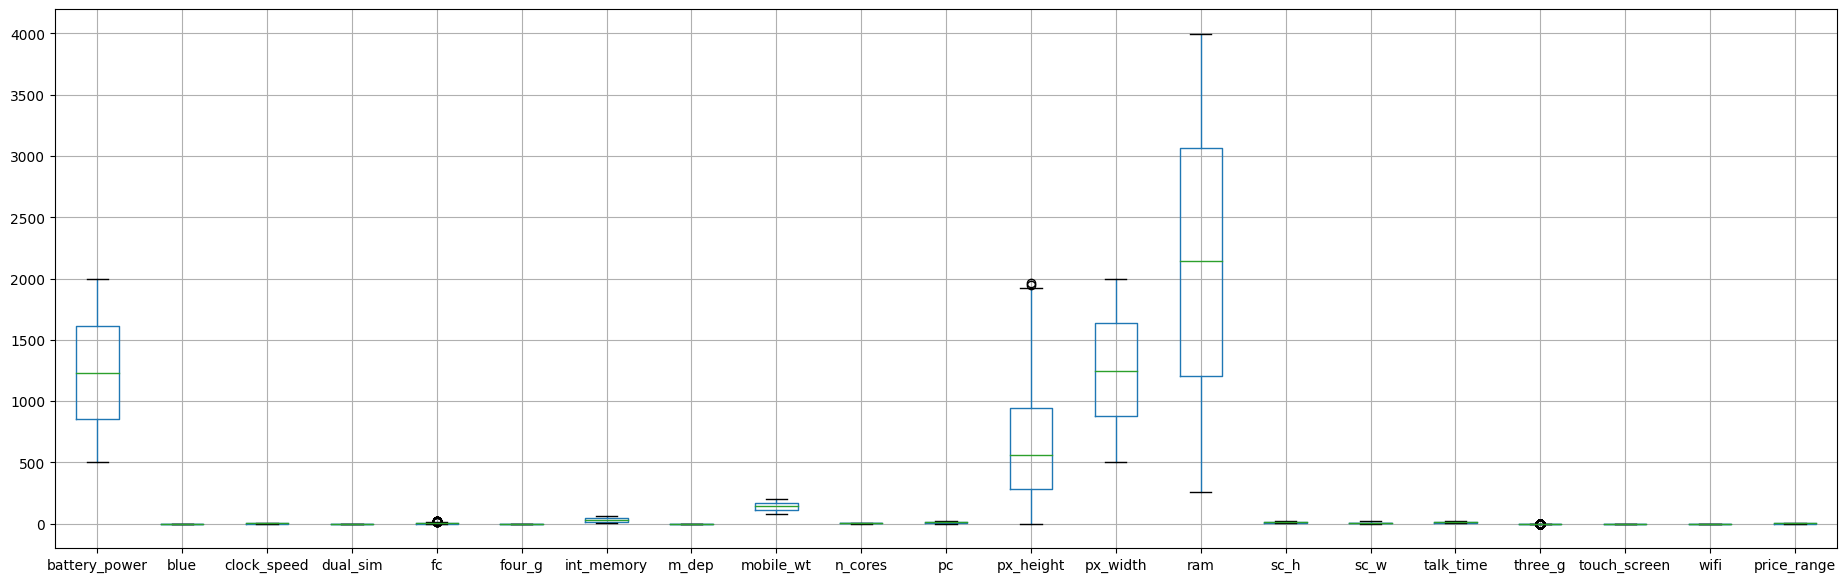

In [ ]:
# Generate boxplot
data.boxplot(figsize=(23, 7))

In [ ]:
# Create a mask and apply it to the data to get rid of outliers
outlier_mask = (z_scores.abs() > 2.5)
data = data[~outlier_mask.any(axis=1)]

<Axes: >

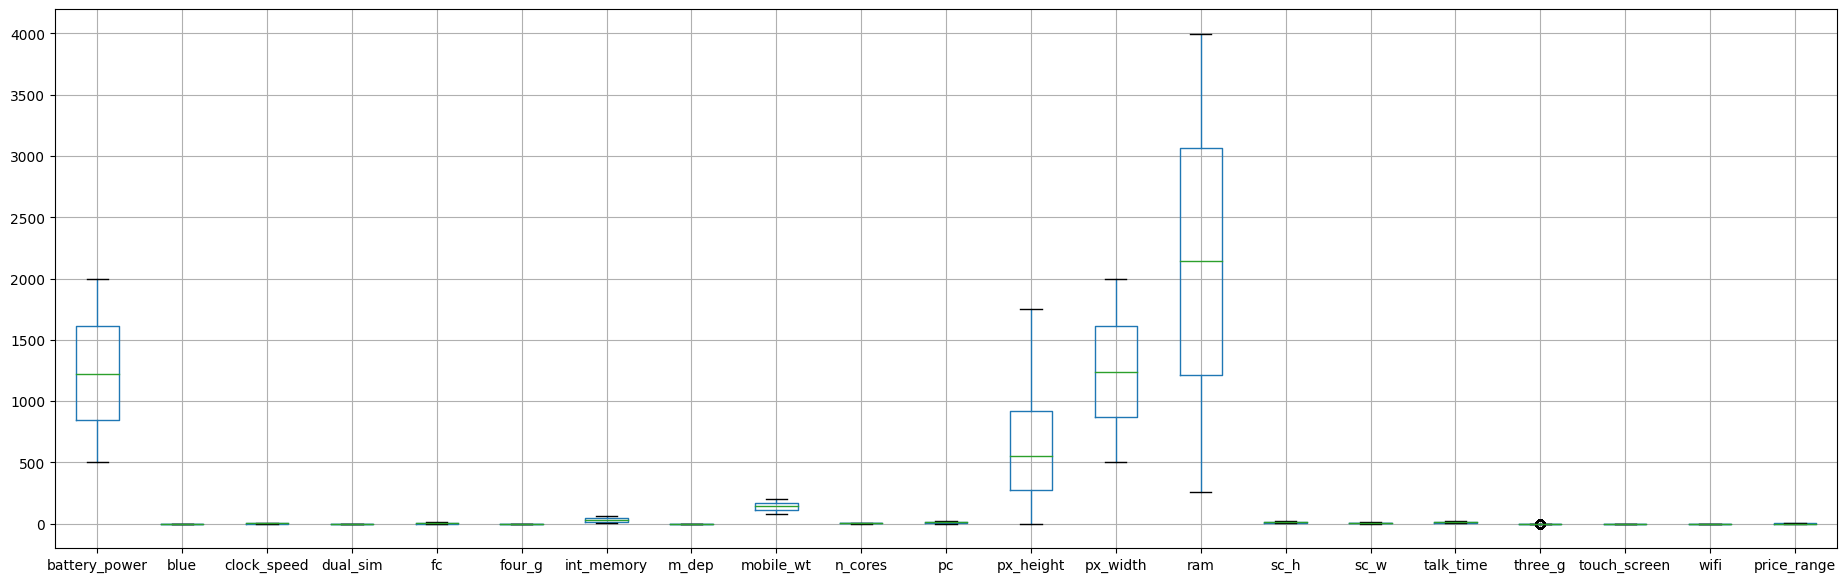

In [ ]:
# Generate boxplot
data.boxplot(figsize=(23, 7))

In [ ]:
# Split the data into features and target
X = data.drop('price_range', axis=1)
y = data['price_range']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=30)

# Logistic Regression

In [ ]:
# Logistic Regression with no pre-processing or hyperparameter tuning
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
# Evaluation criteria
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression: ")
print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)

Logistic Regression: 
Accuracy is  : 74.0
F1 score is : 74.0
Precision is  : 74.0
Recall is  : 73.79


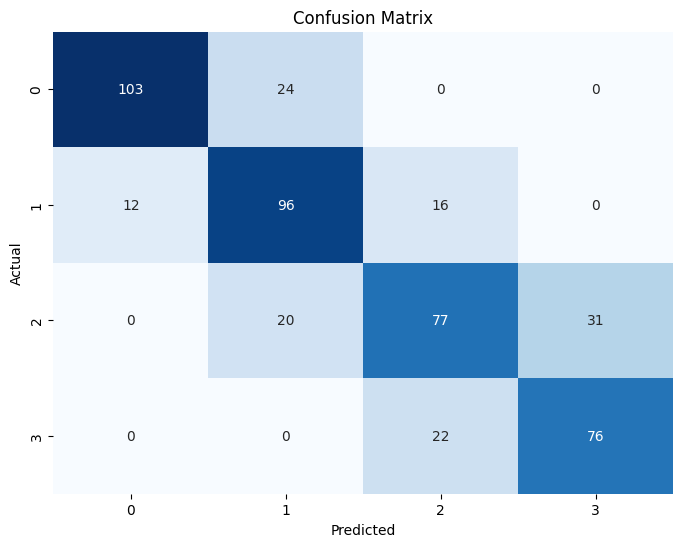

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       127
           1       0.69      0.77      0.73       124
           2       0.67      0.60      0.63       128
           3       0.71      0.78      0.74        98

    accuracy                           0.74       477
   macro avg       0.74      0.74      0.74       477
weighted avg       0.74      0.74      0.74       477



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

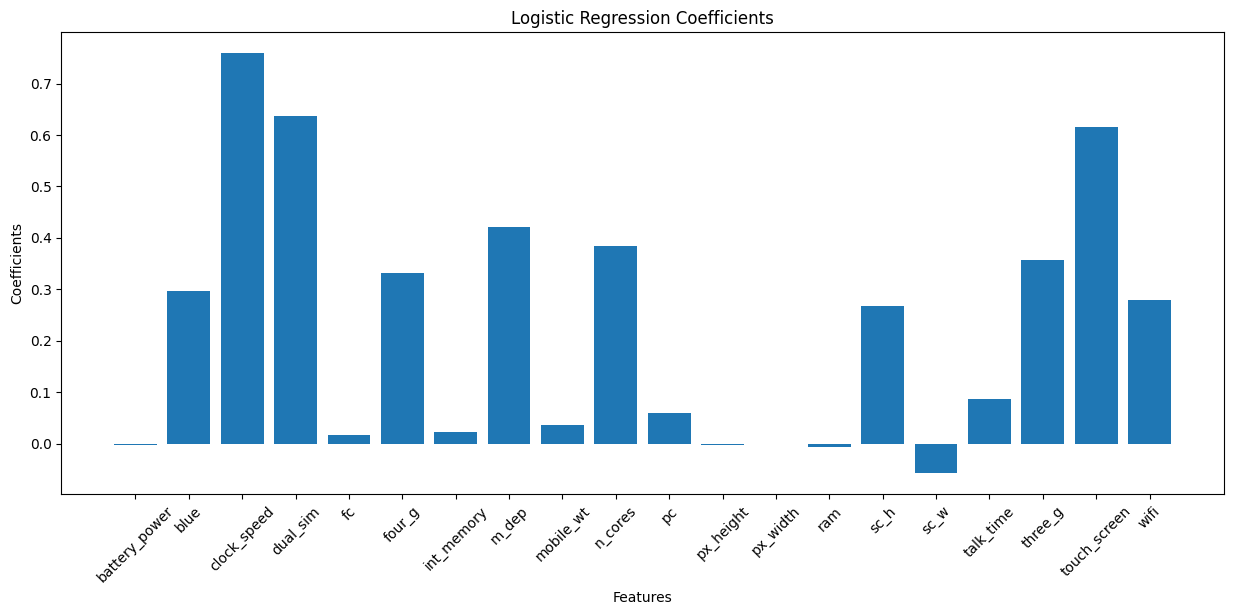

In [ ]:
# Access coefficients
coefficients = lr.coef_[0]

# Create a bar chart of feature importances
plt.figure(figsize=(15, 6))
plt.bar(X_train.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45)
plt.show()

# Logistic Regression w/ pre-processing and search

In [ ]:
# Logistic regression with pre-processing and search

pipeline = Pipeline([('scaler', StandardScaler()),('poly',PolynomialFeatures(degree=2)), ('logistic',LogisticRegression(max_iter=10000))])

#gridsearch parameters

params = { 'logistic__C':[0.1,1,10], 'logistic__penalty':['l1','l2'],'logistic__solver':['liblinear']}

grid_search = GridSearchCV(pipeline, params, cv=8, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 8 folds for each of 6 candidates, totalling 48 fits


GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'logistic__C': [0.1, 1, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear']},
             verbose=1)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print("Best hyperparameters", grid_search.best_params_)

Best hyperparameters {'logistic__C': 1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression with pre-processing and tuning: ")
print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)

Logistic Regression with pre-processing and tuning: 
Accuracy is  : 92.0
F1 score is : 92.0
Precision is  : 92.0
Recall is  : 92.24


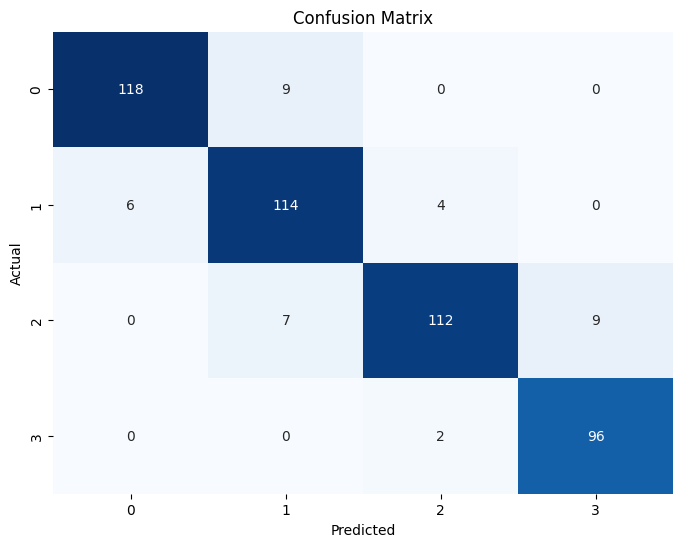

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       127
           1       0.88      0.92      0.90       124
           2       0.95      0.88      0.91       128
           3       0.91      0.98      0.95        98

    accuracy                           0.92       477
   macro avg       0.92      0.93      0.92       477
weighted avg       0.92      0.92      0.92       477



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

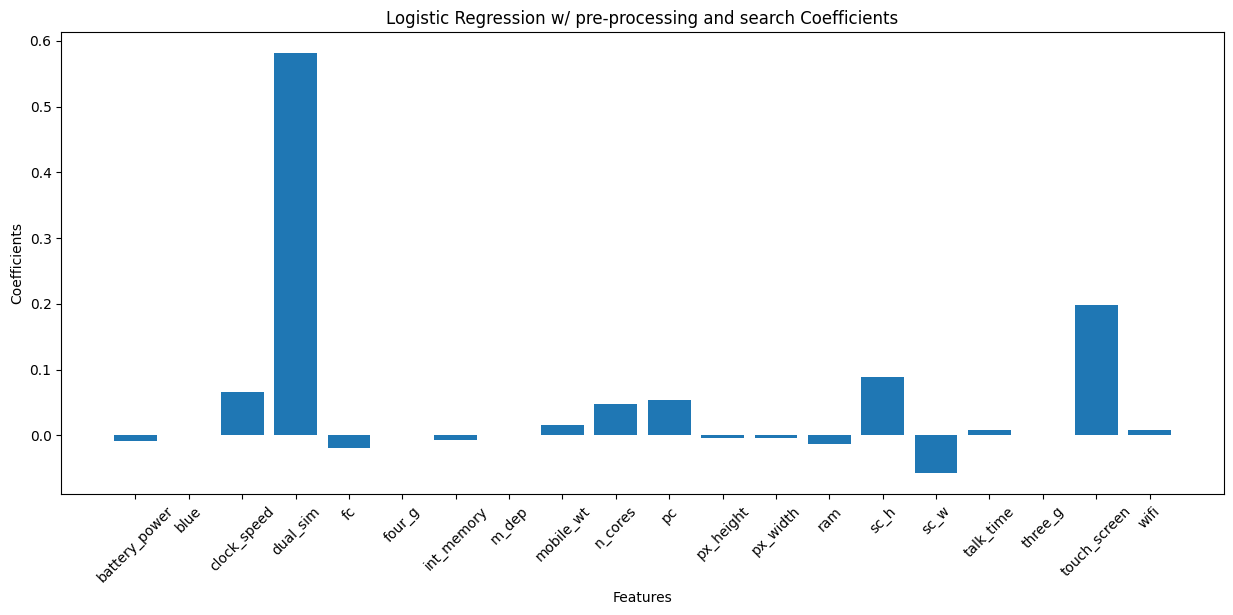

In [ ]:
# Access the best parameters from the grid search
best_params = grid_search.best_params_

# Create an instance of the best model using the best parameters
best_logreg_model = LogisticRegression(C=best_params['logistic__C'], penalty=best_params['logistic__penalty'], solver=best_params['logistic__solver'], max_iter=10000)
best_logreg_model.fit(X_train, y_train)

# Access coefficients from the best model
coefficients = best_logreg_model.coef_[0]

# Create a bar chart of feature importances
plt.figure(figsize=(15, 6))
plt.bar(X_train.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Logistic Regression w/ pre-processing and search Coefficients')
plt.xticks(rotation=45)
plt.show()

# XGBoost Classifier w/ search

In [ ]:
# Define the XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=8, verbose=1, n_jobs=-1)

In [ ]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

Fitting 8 folds for each of 108 candidates, totalling 864 fits


GridSearchCV(cv=8,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create the final XGBoost model
final_xgb_model = XGBClassifier(**best_params)

In [ ]:
# Fit the final model to the training data
final_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions on the test set
y_pred = final_xgb_model.predict(X_test)

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("XGBoost Classifier with pre-processing and tuning: ")
print('Accuracy is  :' ,round(accuracy,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)

XGBoost Classifier with pre-processing and tuning: 
Accuracy is  : 90.0
F1 score is : 90.0
Precision is  : 90.0
Recall is  : 90.14999999999999


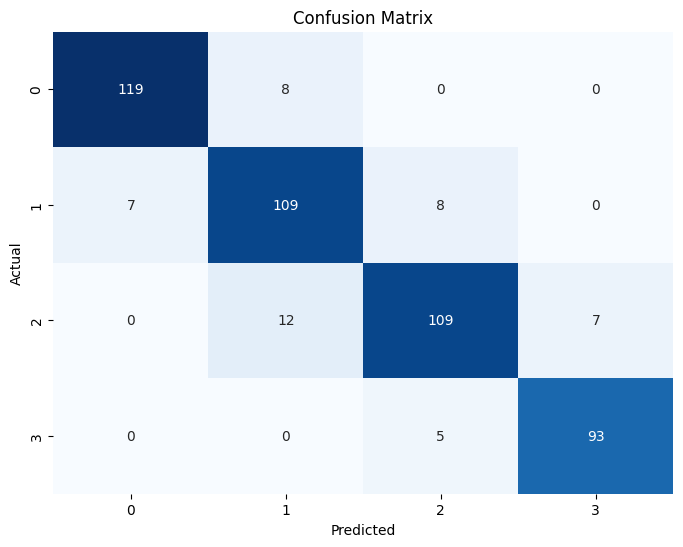

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       127
           1       0.84      0.88      0.86       124
           2       0.89      0.85      0.87       128
           3       0.93      0.95      0.94        98

    accuracy                           0.90       477
   macro avg       0.90      0.90      0.90       477
weighted avg       0.90      0.90      0.90       477



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

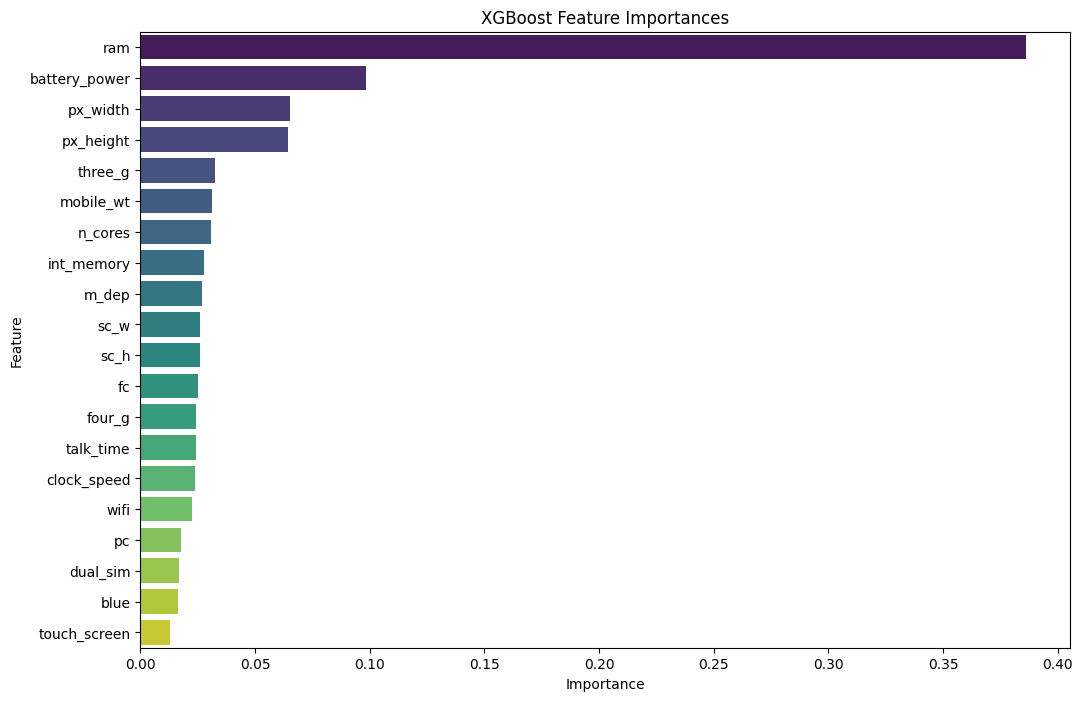

In [ ]:
# Get feature importances
feature_importances = final_xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.show()

Emir Şenel 20190702062